# Hackathon : Preise the Box Project

In [1]:
import sys, os
sys.path.append("../../..")

import gempy as gp
import gempy.addons.sandbox as sb 

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Kinect initialization

In [2]:
kinect=sb.Kinect(dummy=True)


dummy mode. get_frame() will return a synthetic depth frame, other functions may not work


In [3]:
beamer=sb.Beamer()
beamer.resolution=(1920,1080)
beamer.start_stream()
calibration=beamer.calibration
calibration.create()
# calibration.load(calibration_file="sandbox_VRlab.dat")

calibration not provided or invalid. a new calibration was created.
no associated kinect specified, using last kinect instance created


interactive(children=(IntSlider(value=0, continuous_update=False, description='rot_angle', max=180, min=-180), IntRangeSlider(value=(0, 640), continuous_update=False, description='x_lim', max=640), IntRangeSlider(value=(0, 480), continuous_update=False, description='y_lim', max=480), IntSlider(value=0, description='x_pos', max=800), IntSlider(value=0, description='y_pos', max=600), FloatSlider(value=1.0, continuous_update=False, description='scale_factor', max=4.0, min=0.1, step=0.01), IntRangeSlider(value=(800, 1400), continuous_update=False, description='z_range', max=2000, min=500), IntSlider(value=400, continuous_update=False, description='box_width', max=2000), IntSlider(value=300, continuous_update=False, description='box_height', max=2000), ToggleButton(value=False, description='display a legend', icon='check', tooltip='Description'), IntRangeSlider(value=(550, 799), continuous_update=False, description='legend_x_lim', max=800), IntRangeSlider(value=(500, 550), continuous_update=False, description='legend_y_lim', max=600), ToggleButton(value=False, description='display a profile area', icon='check', tooltip='Description'), IntRangeSlider(value=(750, 799), continuous_update=False, description='profile_x_lim', max=800), IntRangeSlider(value=(500, 599), continuous_update=False, description='profile_y_lim', max=600), ToggleButton(value=False, description='display a hot area for qr codes', icon='check', tooltip='Description'), IntRangeSlider(value=(750, 799), continuous_update=False, description='hot_x_lim', max=800), IntRangeSlider(value=(500, 599), continuous_update=False, description='hot_y_lim', max=600), ToggleButton(value=False, description='Close calibration', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

### Extract depth

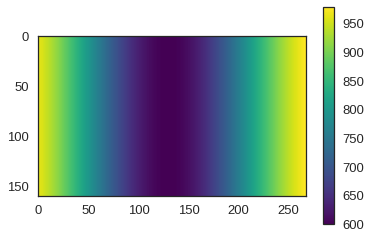

In [4]:
import matplotlib.pyplot as plt
plt.imshow(kinect.depth[50:210, 110:378], cmap='viridis')
plt.colorbar()

### Extract Image

In [9]:
photo = kinect.get_rgb_frame()

In [11]:
plt.imshow(kinect.calibrate_frame(photo), cmap='viridis')


using last calibration instance created.


RuntimeError: invalid rotation plane specified

## Image recognition

In [10]:
import gempy.hackathon as hk

In [ ]:
hk.where_circles()

In [ ]:
hk.where_non_circles()

In [ ]:
hk.plot_all_shapes()

## Seismic forward modelling XY

## Seismic for geology